<a href="https://colab.research.google.com/github/m-kanuri/m-kanuri.github.io/blob/main/NeualNetworkDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Original Training set shape: (50000, 32, 32, 3)
Original Testing set shape: (10000, 32, 32, 3)
Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)


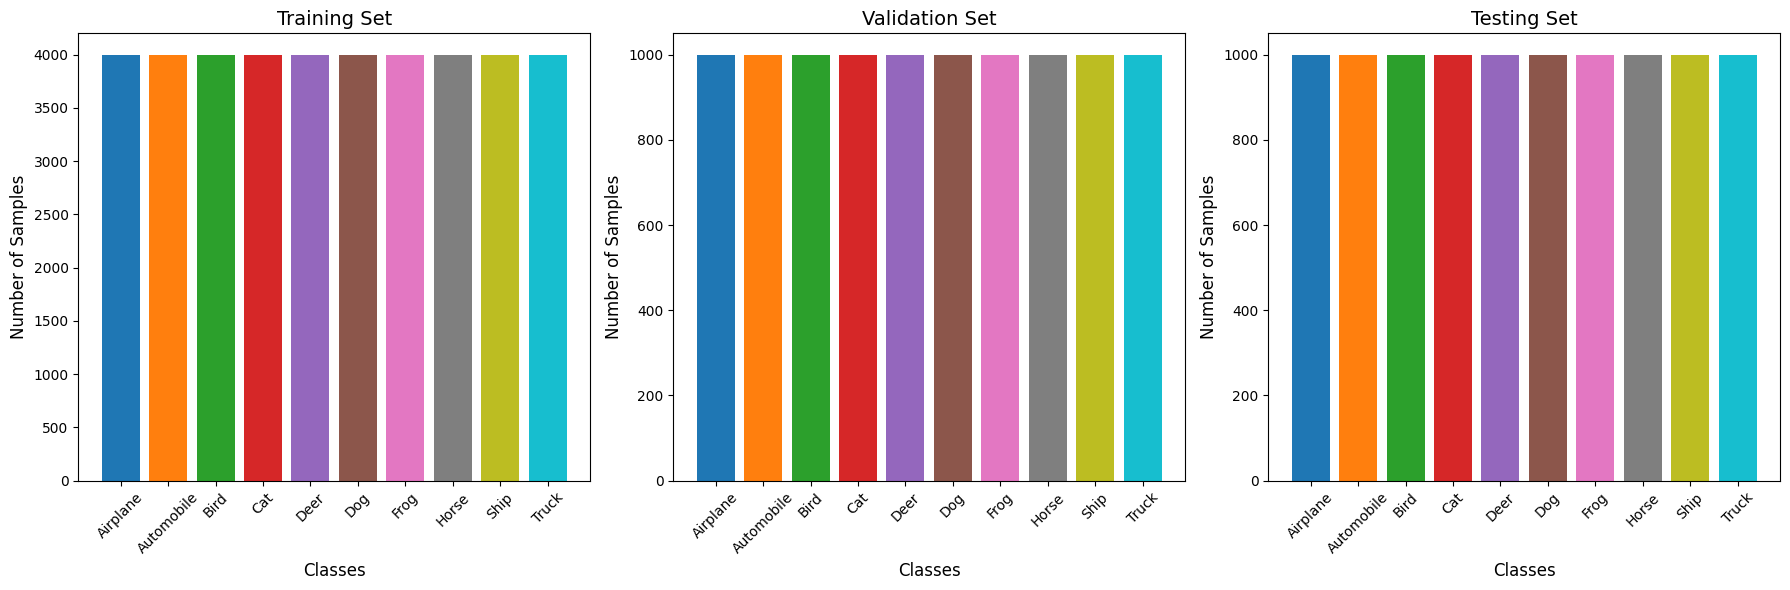

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

#  Confirm dataset dimensions
print("Original Training set shape:", X_train_full.shape)  # (50000, 32, 32, 3)
print("Original Testing set shape:", X_test.shape)        # (10000, 32, 32, 3)

# Split training data into 80% training and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Verify the dimensions of the partitions
print("Training set shape:", X_train.shape)  # (40000, 32, 32, 3)
print("Validation set shape:", X_val.shape)  # (10000, 32, 32, 3)
print("Testing set shape:", X_test.shape)    # (10000, 32, 32, 3)

# Class names corresponding to CIFAR-10 labels (0-9)
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Function to plot the distribution of classes in a dataset
def plot_class_distribution(y, title, ax):
    unique, counts = np.unique(y, return_counts=True)
    ax.bar(class_names, counts, color=plt.cm.tab10.colors)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Classes", fontsize=12)
    ax.set_ylabel("Number of Samples", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Create a grid for three plots: Training, Validation, Testing
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot class distributions for each dataset
plot_class_distribution(y_train, "Training Set", axes[0])
plot_class_distribution(y_val, "Validation Set", axes[1])
plot_class_distribution(y_test, "Testing Set", axes[2])

plt.tight_layout()
plt.show()

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
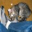

In [2]:
# Show the pixel values of the first image before normalization
X_train[0]
X_val[0]
X_test[0]

In [3]:
#  Data Preprocessing - normalization
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test/ 255.0

In [4]:
# Show the pixel values of the first image after normalization
X_train[0]
X_val[0]
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Split the training data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Before One-Hot Encoding (Integer labels)
print("Before One-Hot Encoding:")
print("y_train (first 5):", y_train[:5].flatten())
print("y_val (first 5):", y_val[:5].flatten())
print("y_test (first 5):", y_test[:5].flatten())
# Apply One-Hot Encoding
num_classes = 10  # CIFAR-10 has 10 classes
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)
# After One-Hot Encoding
print("\nAfter One-Hot Encoding:")
print("y_train_encoded (first 5):\n", y_train_encoded[:5])
print("y_val_encoded (first 5):\n", y_val_encoded[:5])
print("y_test_encoded (first 5):\n", y_test_encoded[:5])

Before One-Hot Encoding:
y_train (first 5): [6 2 5 6 3]
y_val (first 5): [7 8 0 6 1]
y_test (first 5): [3 8 8 0 6]

After One-Hot Encoding:
y_train_encoded (first 5):
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
y_val_encoded (first 5):
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
y_test_encoded (first 5):
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [7]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (40000, 32, 32, 3), y_train shape: (40000, 10)
X_val shape: (10000, 32, 32, 3), y_val shape: (10000, 10)
X_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
model = Sequential([
    # Define the input layer with image dimensions for CIFAR-10 (32x32 pixels, 3 color channels)
    Input(shape=(32, 32, 3)),

    # Convolutional Block 1 : Two convolutional layers to capture basic image patterns, followed by max pooling
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Convolutional Block 2 : Deeper feature extraction with 64 filters, followed by pooling and dropout
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Convolutional Block 3 : Even deeper features captured with 128 filters
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fully Connected Layers : Flatten the 3D feature maps into a 1D vector for the fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])



In [30]:
# Display a detailed summary of the model's architecture, including layer types,
# output shapes, and the total number of parameters
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 847,530 (3.23 MB)

 Trainable params: 846,634 (3.23 MB)

 Non-trainable params: 896 (3.50 KB)

In [9]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Set up early stopping to halt training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model using the training data and validate on the validation set
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/50
 48/625 ━━━━━━━━━━━━━━━━━━━━ 5:40 591ms/step - accuracy: 0.1187 - loss: 3.4472

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 - 20s - 63ms/step - accuracy: 0.8182 - loss: 0.5757
Test Loss: 0.575735330581665
Test Accuracy: 0.8181999921798706


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step


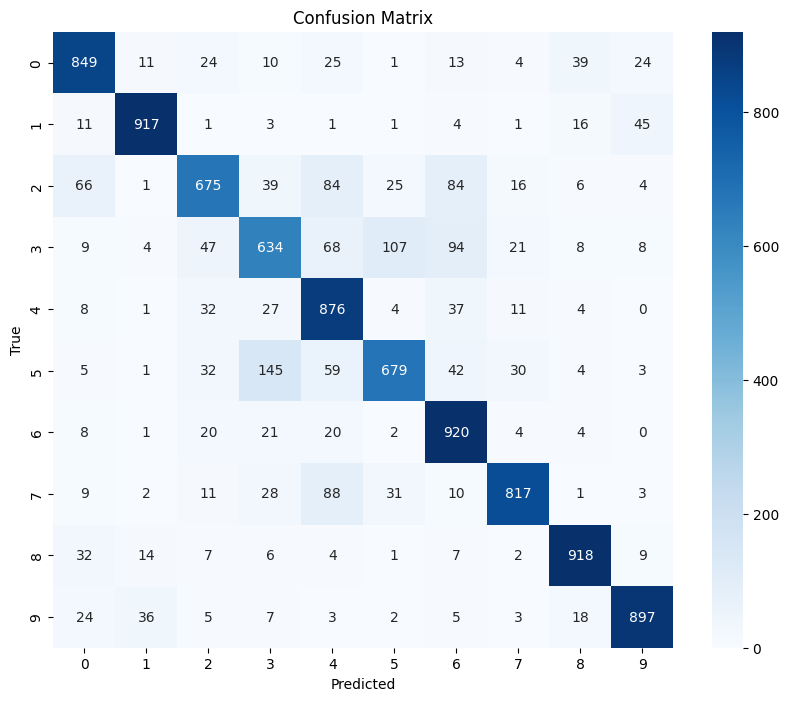

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.93      0.92      0.92      1000
           2       0.79      0.68      0.73      1000
           3       0.69      0.63      0.66      1000
           4       0.71      0.88      0.79      1000
           5       0.80      0.68      0.73      1000
           6       0.76      0.92      0.83      1000
           7       0.90      0.82      0.86      1000
           8       0.90      0.92      0.91      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test_classes, y_pred_classes))


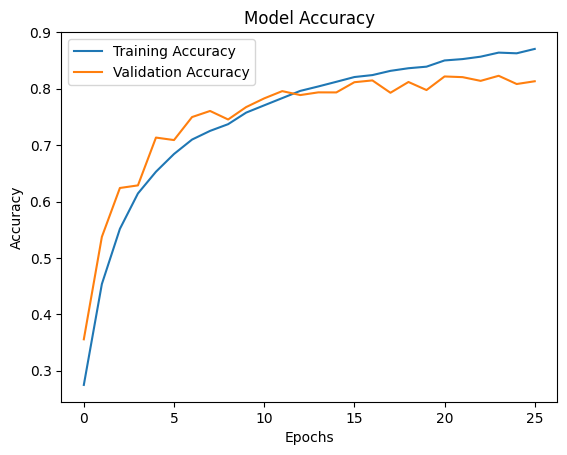

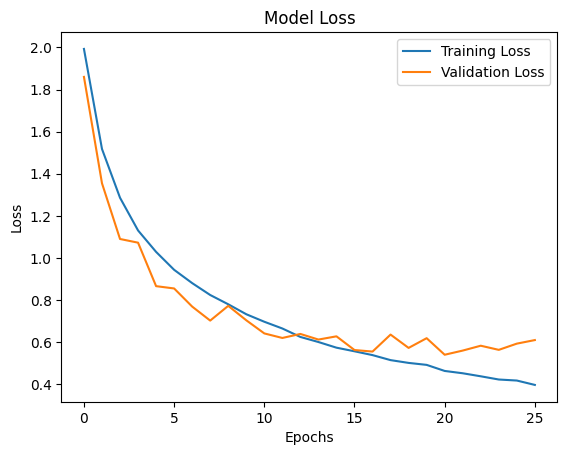

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step


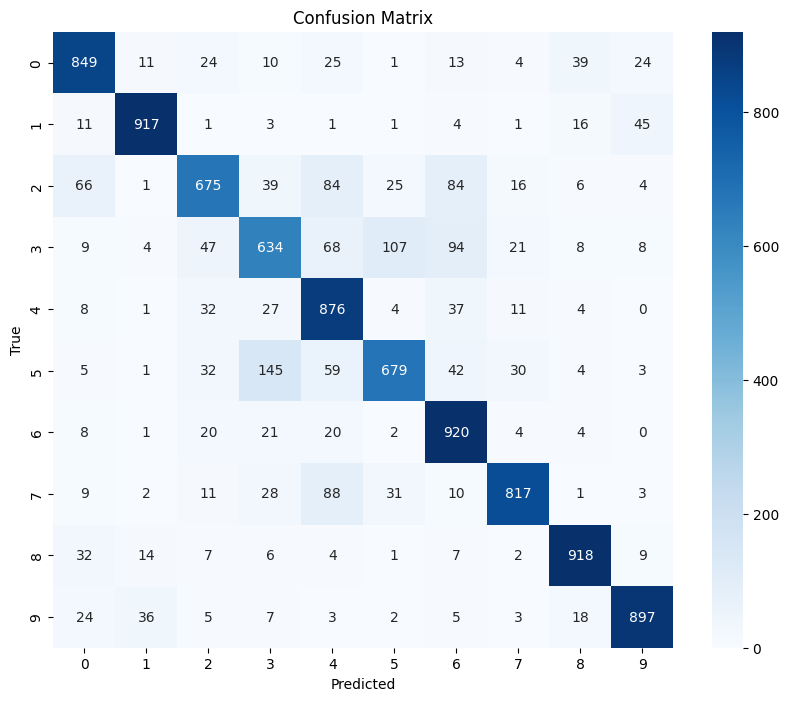

Class 0:
  Precision: 0.83
  Recall:    0.85
  F1-score:  0.84
  Support:   1000.0

Class 1:
  Precision: 0.93
  Recall:    0.92
  F1-score:  0.92
  Support:   1000.0

Class 2:
  Precision: 0.79
  Recall:    0.68
  F1-score:  0.73
  Support:   1000.0

Class 3:
  Precision: 0.69
  Recall:    0.63
  F1-score:  0.66
  Support:   1000.0

Class 4:
  Precision: 0.71
  Recall:    0.88
  F1-score:  0.79
  Support:   1000.0

Class 5:
  Precision: 0.80
  Recall:    0.68
  F1-score:  0.73
  Support:   1000.0

Class 6:
  Precision: 0.76
  Recall:    0.92
  F1-score:  0.83
  Support:   1000.0

Class 7:
  Precision: 0.90
  Recall:    0.82
  F1-score:  0.86
  Support:   1000.0

Class 8:
  Precision: 0.90
  Recall:    0.92
  F1-score:  0.91
  Support:   1000.0

Class 9:
  Precision: 0.90
  Recall:    0.90
  F1-score:  0.90
  Support:   1000.0


Full Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(len(cm)),
            yticklabels=range(len(cm)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test_classes, y_pred_classes, output_dict=True)

# Print metrics for each class
for class_label, metrics in report.items():
    if class_label.isdigit():  # Ensure only numeric classes are included
        print(f"Class {class_label}:")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall:    {metrics['recall']:.2f}")
        print(f"  F1-score:  {metrics['f1-score']:.2f}")
        print(f"  Support:   {metrics['support']}")
        print()

# If you want to display the classification report in a formatted way:
print("\nFull Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Initialize dictionaries to store results
metrics = {}

# Calculate metrics for each class
num_classes = cm.shape[0]  # Number of classes
for class_idx in range(num_classes):
    # True Positives (TP)
    tp = cm[class_idx, class_idx]

    # False Positives (FP)
    fp = cm[:, class_idx].sum() - tp

    # False Negatives (FN)
    fn = cm[class_idx, :].sum() - tp

    # True Negatives (TN)
    tn = cm.sum() - (tp + fp + fn)

    # Store the results
    metrics[class_idx] = {
        'True Positives': tp,
        'False Positives': fp,
        'False Negatives': fn,
        'True Negatives': tn
    }

# Print the results for each class
for class_idx, values in metrics.items():
    print(f"Class {class_idx}:")
    print(f"  True Positives: {values['True Positives']}")
    print(f"  False Positives: {values['False Positives']}")
    print(f"  False Negatives: {values['False Negatives']}")
    print(f"  True Negatives: {values['True Negatives']}")
    print()


Class 0:
  True Positives: 885
  False Positives: 231
  False Negatives: 115
  True Negatives: 8769

Class 1:
  True Positives: 902
  False Positives: 58
  False Negatives: 98
  True Negatives: 8942

Class 2:
  True Positives: 640
  False Positives: 130
  False Negatives: 360
  True Negatives: 8870

Class 3:
  True Positives: 667
  False Positives: 376
  False Negatives: 333
  True Negatives: 8624

Class 4:
  True Positives: 829
  False Positives: 277
  False Negatives: 171
  True Negatives: 8723

Class 5:
  True Positives: 684
  False Positives: 169
  False Negatives: 316
  True Negatives: 8831

Class 6:
  True Positives: 905
  False Positives: 264
  False Negatives: 95
  True Negatives: 8736

Class 7:
  True Positives: 863
  False Positives: 126
  False Negatives: 137
  True Negatives: 8874

Class 8:
  True Positives: 901
  False Positives: 100
  False Negatives: 99
  True Negatives: 8900

Class 9:
  True Positives: 889
  False Positives: 104
  False Negatives: 111
  True Negatives: 

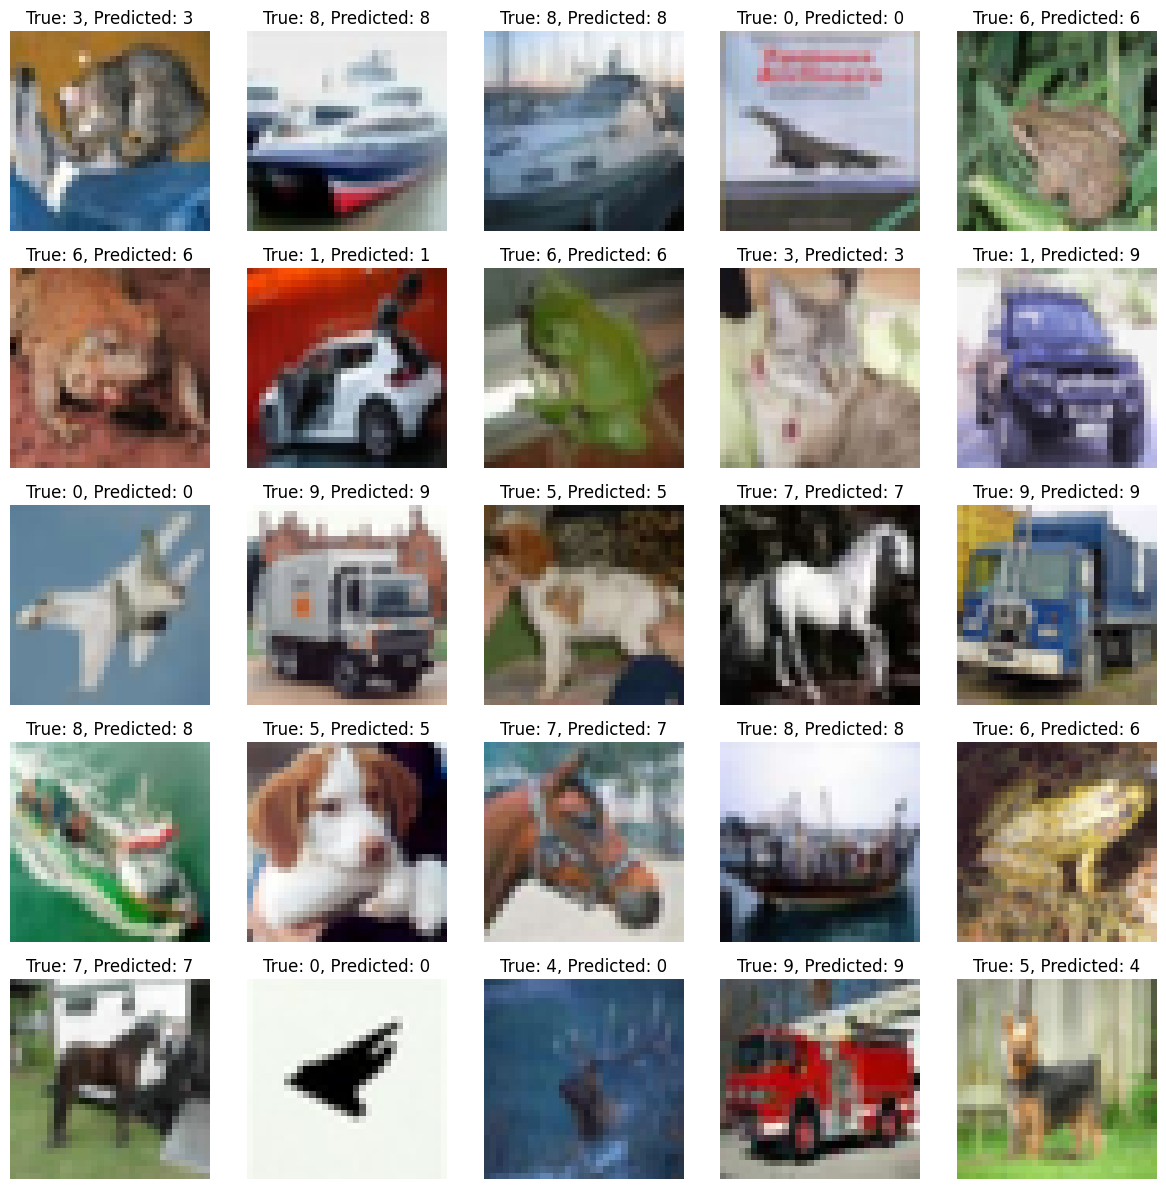

In [ ]:
# Visualize some predictions
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
 ax.imshow(X_test[i])
 ax.set_title(f"True: {y_test_classes[i]}, Predicted: {y_pred_classes[i]}")
 ax.axis('off')
plt.tight_layout()
plt.show()

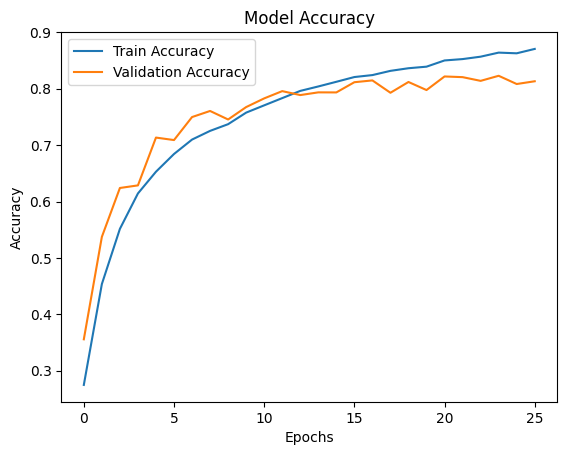

In [19]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


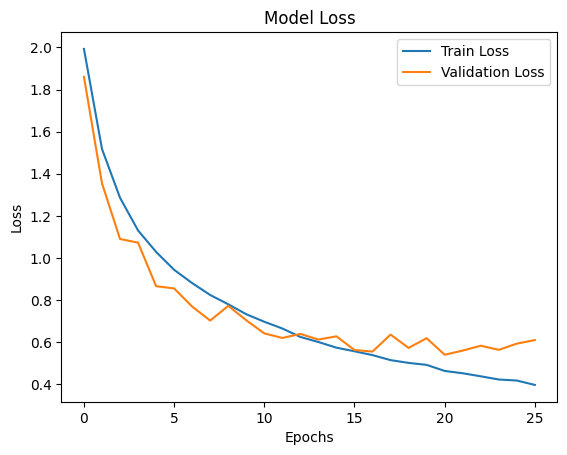

In [16]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()